In [285]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import pi
import sydney_weather_data

%load_ext autoreload

%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [286]:
df = sydney_weather_data.load_data()

In [288]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
count,2710,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.0,2710.0,2710.000000
mean,2013-01-23 09:39:43.173431552,14.776845,23.021624,3.200221,5.216900,7.296365,27.039852,15.115867,19.316236,67.611070,53.985609,1018.446384,1016.065956,4.158303,4.205535,17.774244,21.551402,0.0,0.0,6.505904
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,19.000000,10.000000,986.700000,990.300000,0.000000,0.000000,6.400000,10.200000,0.0,0.0,1.000000
25%,2010-01-11 06:00:00,11.000000,19.625000,0.000000,3.200000,4.500000,0.000000,11.000000,15.000000,58.000000,43.000000,1013.900000,1011.300000,1.000000,1.000000,13.800000,18.400000,0.0,0.0,4.000000
50%,2013-09-22 12:00:00,14.800000,22.800000,0.000000,4.800000,8.400000,31.000000,15.000000,19.000000,68.000000,55.000000,1018.700000,1016.400000,4.000000,4.000000,18.000000,21.300000,0.0,0.0,7.000000
75%,2015-08-12 18:00:00,18.700000,26.000000,1.200000,7.000000,10.200000,44.000000,20.000000,24.000000,79.000000,64.000000,1023.200000,1020.900000,7.000000,7.000000,21.700000,24.500000,0.0,0.0,9.000000
max,2017-06-25 00:00:00,27.100000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,96.000000,1039.000000,1036.000000,9.000000,8.000000,36.500000,44.700000,0.0,0.0,12.000000
std,NaN,4.544067,4.513887,9.536437,2.788739,3.763332,22.563603,6.917795,7.410547,15.260698,16.271874,6.981884,7.019292,2.750421,2.641529,4.907702,4.303395,0.0,0.0,3.355926


In [331]:
#[, , , , , , ,  , , , , , ],
#['W', 'WNW', 'SSW', 'S', 'E', 'ESE', 'SSE', 'NNW', 'N', 'WSW', 'SE', 'NNE', 'NW', 'NE', 'ENE', 'SW'],
#['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'SW', '']
wind_direct = ['N','NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW',  'WSW', 'W', 'WNW', 'NW', 'NNW']
wind_direct_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W',  'NW']

In [332]:
df_wind_dir_morning = df['WindDir9am'].value_counts().reindex(wind_direct)
df_wind_dir_afternoon = df['WindDir3pm'].value_counts().reindex(wind_direct)



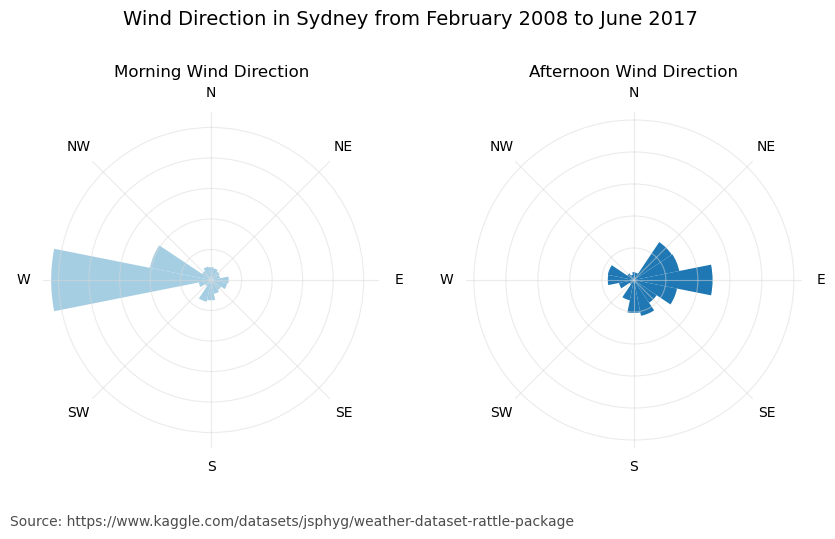

In [347]:
data_list = [df_wind_dir_morning, df_wind_dir_afternoon]
colors = ['#a6cee3', '#1f78b4']
chart_titles = ['Morning Wind Direction', 'Afternoon Wind Direction']
#data = df_wind_dir_morning
fig, ax = plt.subplots(1, 2, figsize=(10, 6), subplot_kw={'projection':'polar'})
angles = np.arange(0,360,360/len(wind_direct_labels))
heights = [1,2,5]
startangle =-22.5/2

for j, data in enumerate(data_list):
    for i, d in enumerate(data):
        x = (22.5 * pi *2)/ 360
        left = (startangle * pi *2)/ 360 #this is to control where the bar startsplt.xticks([])
        startangle += 22.5
        #left = 0 #this is to control where the bar startsplt.xticks([])
        ax[j].spines.clear()
        ax[j].barh(0, x, left=left, height=d, align='edge', color = colors[j] )
        ax[j].set_theta_offset(.5*pi)
        ax[j].set_theta_direction(-1)
        ax[j].set_thetagrids(angles, labels=wind_direct_labels, fmt=None)
        ax[j].set_title(chart_titles[j])
        ax[j].grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=0)
        ax[j].grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
        ax[j].set_yticks([200,400,600,800,1000], labels = "")
        
        #plt.yticks([])
plt.ylim(-0, 1050)
plt.subplots_adjust(left=None, bottom=0.25, right=None, top=0.81, wspace=None, hspace=None)
fig.suptitle('Wind Direction in Sydney from February 2008 to June 2017', fontsize=14)
fig.text(x=0.10, y=0.12, s="Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)
plt.show()

In [382]:
#df.groupby([]).
#df.groupby(['WindSpeed9am', 'WindSpeed3pm', 'month'])['WindSpeed9am'].mean().unstack('month').reset_index()
windspeed_group_month = df.groupby(['month'])[['WindSpeed9am', 'WindSpeed3pm']].mean().reset_index()
windspeed_group_month

,month,WindSpeed9am,WindSpeed3pm
0,1,12.076923,21.225962
1,2,13.103627,20.497409
2,3,12.795833,20.295833
3,4,15.430380,17.679325
4,5,16.875519,15.983402
5,6,17.394737,15.140351
6,7,17.172131,16.893443
7,8,17.685714,18.359184
8,9,15.658009,20.878788
9,10,14.831858,21.424779


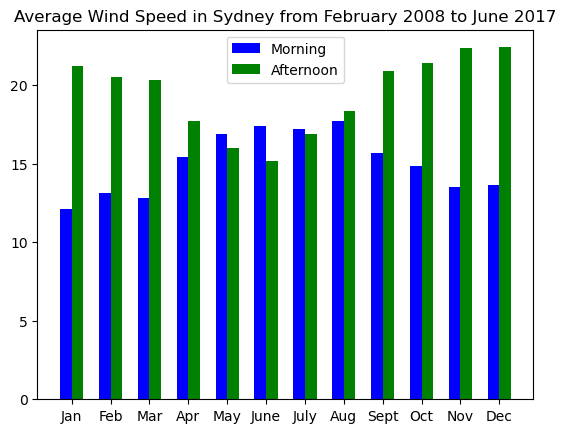

In [404]:
data = windspeed_group_month
x = windspeed_group_month['month']
bar_width = .3
ax = plt.subplot()
ax.bar(x-bar_width/2, windspeed_group_month['WindSpeed9am'], width=bar_width, color='b', align='center', label = 'Morning')
ax.bar(x+bar_width/2, windspeed_group_month['WindSpeed3pm'], width=bar_width, color='g', align='center', label = 'Afternoon')
ax.set_xticks(x, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax.set_title('Average Wind Speed in Sydney from February 2008 to June 2017')
plt.legend()
plt.show()


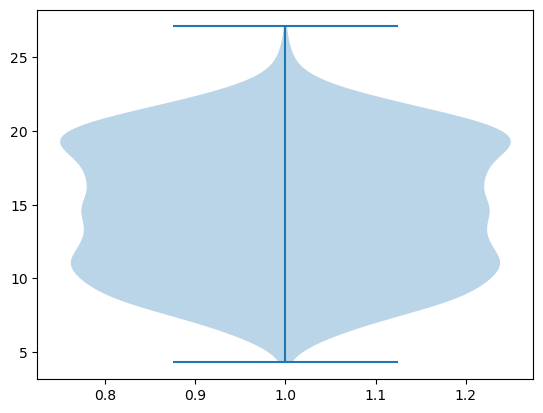

In [73]:
fig, ax = plt.subplots()
ax.violinplot(data['MinTemp'])
plt.show()

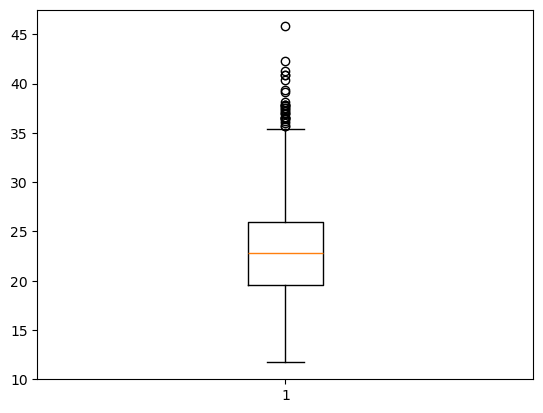

In [22]:
fig, ax = plt.subplots()
ax.boxplot(data['MaxTemp'])
plt.show()